## Question 1: K-Means Clustering with tinypics

### 1a. Visualize the data

In [152]:
from scipy.io import loadmat 
import numpy as np
tinypics = loadmat('tinypics.mat')['data']

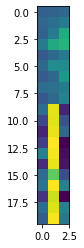

In [153]:
import matplotlib.pyplot as plt
image = plt.imshow(tinypics, cmap = 'viridis')

### 1b. Make a 3-D scatter plot

<IPython.core.display.Javascript object>


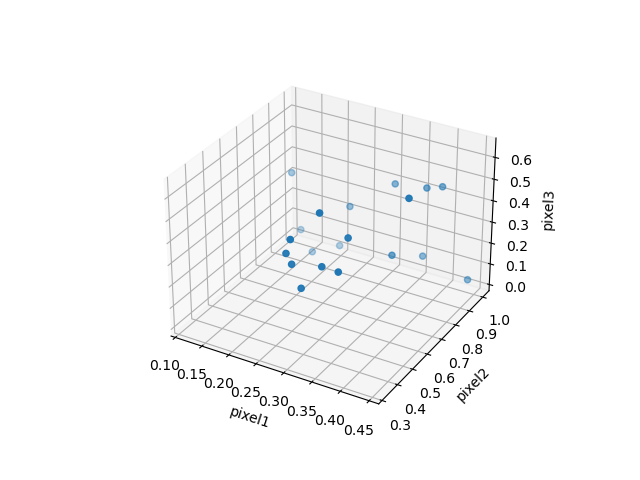

Text(0.5, 0, 'pixel3')

In [77]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter3D(tinypics[:,0], tinypics[:,1], tinypics[:,2], cmap = 'bwr')
ax.set_xlabel('pixel1')
ax.set_ylabel('pixel2')
ax.set_zlabel('pixel3')

### 3c. Implement kmeans

In [78]:
from __future__ import print_function
import numpy as np
import sys

def kmeans(X, k, init=None):
    """ KMEANS implements the k-means algorithm.

    [CLUSTERS, CENTROIDS] = KMEANS(X, K) partitions the data points
    in the N-by-P data matrix X into K distinct clusters, using Euclidean
    distance. This is a simple implementation of the k-means algorithm with
    random initialization.

    Optionally, it takes the argument INIT, a K-by-P matrix with a fixed
    initial position for the cluster centroids.  

    MYKMEANS returns an N-by-1 vector CLUSTERS containing the cluster
    indices of each data point, as well as CENTROIDS, a K-by-P matrix with 
    the final cluster centroids' locations.
    """


    n, p = X.shape

    if init is None:
      #choose initial centroids by picking k points at random from X
      init = X[np.random.randint(n, size=k), :]
    
    #centroids is a k-by-p random matrix
    #its i^th row contains the coordinates of the cluster with index i
    centroids = init

    #initialize cluster assignment array
    clusters = np.zeros(n)

    MAXITER = 1000

    for iter in range(MAXITER):
        
        #create a new clusters vector to fill in with updated assignments
        new_clusters = np.zeros(n)
        

        #for each data point x_i
        for i in range(n):
            
            x_i = X[i,:]
            
            #find closest cluster
            closest = findClosestCluster(x_i, centroids)###IMPLEMENT THIS FUNCTION AT THE END OF THIS FILE

            #reassign x_i to the index of the closest centroid found
            new_clusters[i] = closest
        
        
        if hasConverged(clusters,new_clusters):###IMPLEMENT THIS FUNCTION AT THE END OF THIS FILE
            #exit loop
            break 
        
        
        #otherwise, update assignment
        clusters = new_clusters
        #and recompute centroids
        centroids = recomputeCentroids(X,clusters,k)###IMPLEMENT THIS FUNCTION AT THE END OF THIS FILE

    

    if iter == (MAXITER-1):
        print('Maximum number of iterations reached!')
    
    return clusters, centroids
    

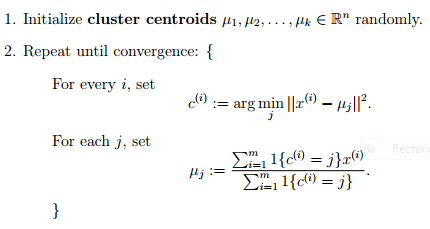
(Pseudo-code retrieved from https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)

In [79]:
def findClosestCluster(x_i,centroids):
    # Compute Euclidean distance from x_i to each cluster centroid and return 
    # the index of the closest one (an integer).
    # NOTE: use of numpy/scipy.linalg.norm function is NOT allowed here.

    ### Replace the following line with your own code
    closest = 0
    cur_min_dist = sys.maxsize
    K = len(centroids)
    for k in range(K):
        dist = np.sqrt(sum((x_i - centroids[k]) ** 2))
        if dist < cur_min_dist:
            closest = k
            cur_min_dist = dist
            
    return closest



def hasConverged(old_assignment, new_assignment):
    # Check if algorithm has converged, i.e., cluster assignments haven't
    # changed since last iteration. Return a boolean.

    ### Replace the following line with your own code
    converged = True;
    
    n = len(old_assignment)
    for i in range(n):
        if (old_assignment[i] != new_assignment[i]):
            return False
    return converged



def recomputeCentroids(X,clusters,K):
    # Recompute centroids based on current cluster assignment.
    # Return a k-by-p array where each row is a centroid. 
    
    N, P = X.shape

    ### Replace the following line with your own code
    centroids = np.zeros((K,P))
    
    for k in range(K):
        points = [X[i] for i in range(N) if clusters[i] == k]
        centroids[k] = np.mean(points, axis = 0)
    
    return centroids

### 1d. Run kmeans on tinypics data

In [80]:
def kmeans_plot3D(X, k):
    
    clusters, centroids = kmeans(X, k)
    print(clusters)
    print(centroids)
    
    %matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D
    ax = plt.axes(projection='3d')

    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = clusters, s=50, cmap='viridis')
    
    for i in range(k):
        ax.scatter3D(centroids[i, 0], centroids[i, 1], tinypics[0, 2], c='red', s=50, marker = 'X');
   
    ax.set_xlabel('pixel1')
    ax.set_ylabel('pixel2')
    ax.set_zlabel('pixel3')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.27962326 0.94747089 0.21983674]
 [0.33422217 0.4054188  0.4819801 ]]


<IPython.core.display.Javascript object>


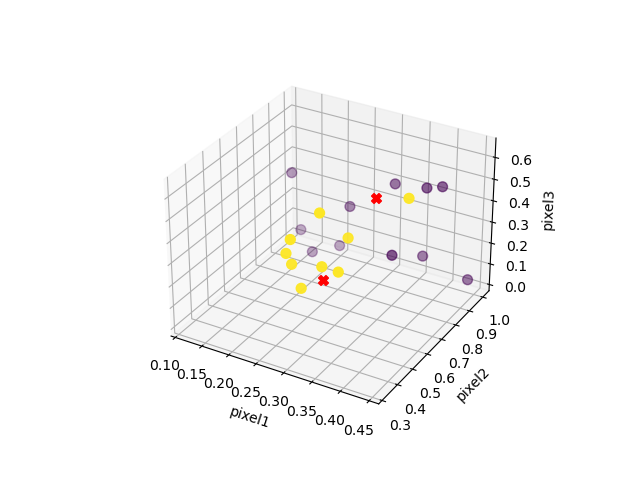

In [81]:
## input: the dataset and k, the number of cluster desired
kmeans_plot3D(tinypics, 2)

As shown above, the two red crosses represents the centroids. The two clusters are represented by yellow dots and purple dots, respectively. 

In [82]:
## check the results against the built-in python package: 

from sklearn.cluster import KMeans
kmeans1 = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=42)
kmeans1.fit(tinypics)
print(kmeans1.cluster_centers_)
print(kmeans1.labels_)

[[0.33422217 0.4054188  0.4819801 ]
 [0.27962326 0.94747089 0.21983674]]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


In [83]:
for i in range(500):
    clusters, centroids = kmeans(tinypics, 2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.27962326 0.94747089 0.21983674]
 [0.33422217 0.4054188  0.4819801 ]]


<IPython.core.display.Javascript object>


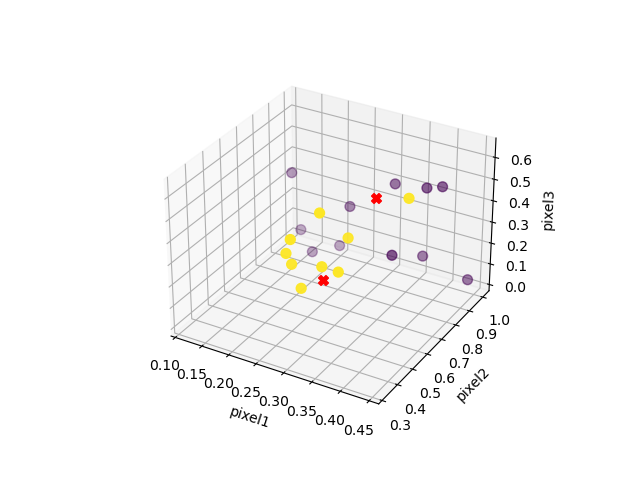

In [84]:
kmeans_plot3D(tinypics, 2)

Although the clusters themselves do not change, the centroids now get updated and become further apart. That is, re-running k-means will make the clusters more distinct from each other. 

## Question 2: K-Means Clustering with logos

### 2a. Display the images

In [85]:
from scipy.io import loadmat
import numpy as np
logos = loadmat('logos.mat')['data']
logos.shape

(48, 100, 10)

<IPython.core.display.Javascript object>


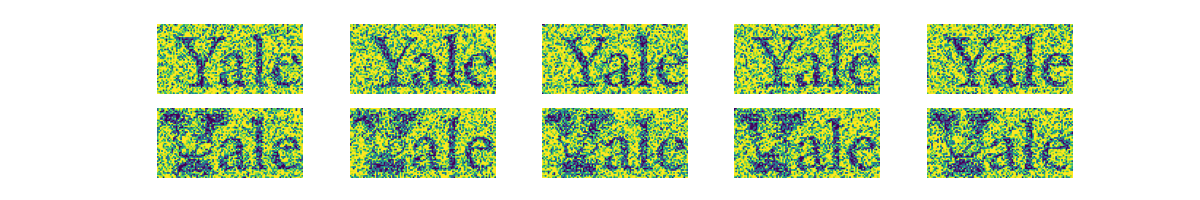

In [86]:
import matplotlib.pyplot as plt

logos_X = np.zeros((10, 4800))

fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = logos[:,:,i].flatten().reshape(48, 100)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')
    ## while plotting, create the data matrix X:
    logos_X[i] = img.flatten().reshape(1, 4800)


By observation, the images in the first row are the official Yale logo whereas the images in the second row are where we have the bulldog mascot on the letter "Y".

### 2b. Reshape

In [87]:
print(logos_X.shape)
for i in range(10):
    print(len(logos_X[i]))

(10, 4800)
4800
4800
4800
4800
4800
4800
4800
4800
4800
4800


Each of the data point (each individual image) now has a dimension of (1, 4800).


### 2c. Run kmeans on logos data

In [88]:
def kmeans_plot2D(X, k):
    
    clusters, centroids = kmeans(X, k)
    print(clusters)
    print(centroids)
    
    %matplotlib notebook

    plt.scatter(X[:, 0], X[:, 1], c = clusters, s=50, cmap='bwr')
    
    for i in range(k):
        plt.scatter(centroids[i, 0], centroids[i, 1], s=50, marker = 'X');
   
    ax.set_xlabel('pixel1')
    ax.set_ylabel('pixel2')

In [89]:
## check the results against the built-in python package: 
from sklearn.cluster import KMeans
kmeans2 = KMeans(init="random", n_clusters=2, max_iter=300, random_state=42)
kmeans2.fit(logos_X)
print(kmeans2.cluster_centers_)
print(kmeans2.labels_)

[[0.63326771 0.76473733 0.87632933 ... 0.70614341 0.88824149 0.83497391]
 [0.77915206 0.76360984 0.84842992 ... 0.77327346 0.73600757 0.88421533]]
[1 1 1 1 1 0 0 0 0 0]


[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
[[0.63326771 0.76473733 0.87632933 ... 0.70614341 0.88824149 0.83497391]
 [0.77915206 0.76360984 0.84842992 ... 0.77327346 0.73600757 0.88421533]]


<IPython.core.display.Javascript object>


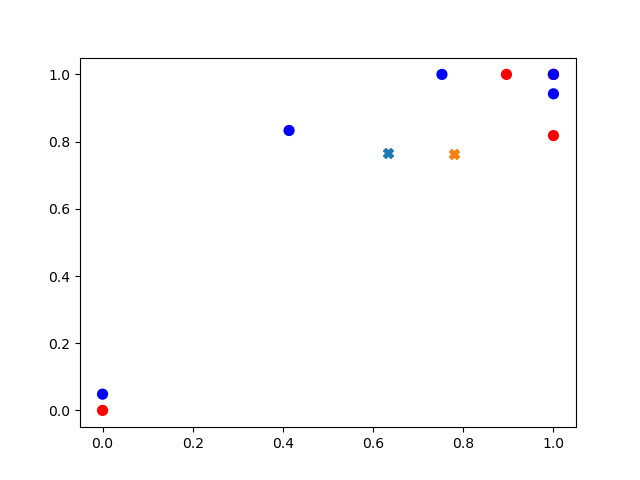

In [90]:
kmeans_plot2D(logos_X,2)

<IPython.core.display.Javascript object>


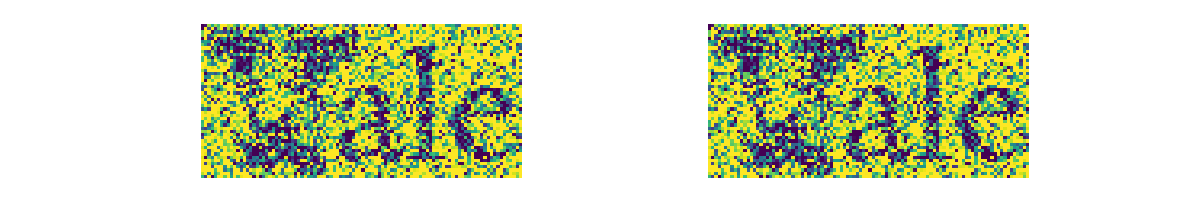

In [91]:
clusters, centroids = kmeans(logos_X, 2)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = centroids[0].reshape(48, 100)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')

In [92]:
for i in range(500):
    clusters, centroids = kmeans(logos_X, 2)

[0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]
[[0.71823651 0.80551456 0.8515134  ... 0.90453269 0.75647629 0.82433024]
 [0.68816995 0.70216213 0.87867897 ... 0.49247206 0.8955969  0.91249119]]


<IPython.core.display.Javascript object>


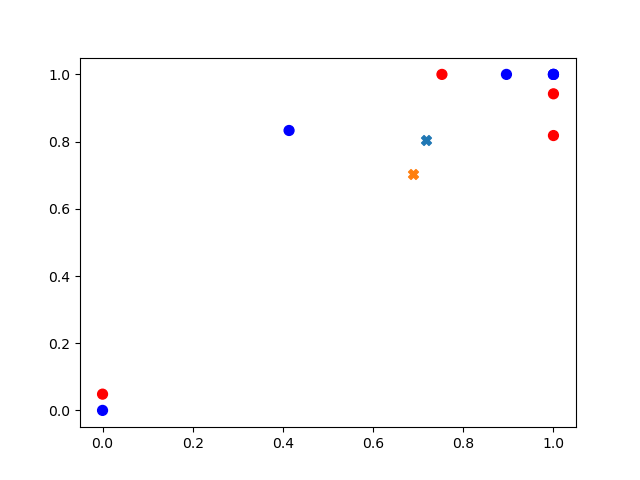

<IPython.core.display.Javascript object>


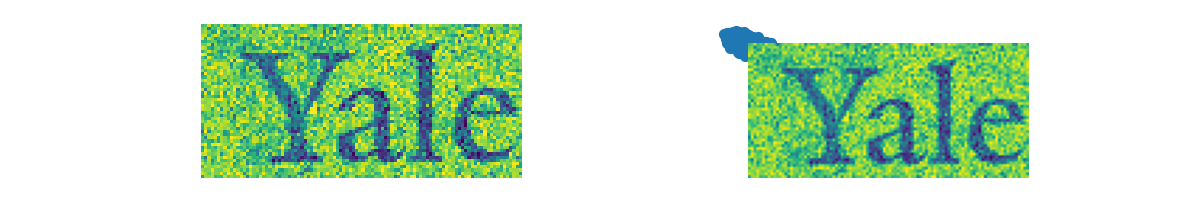

In [93]:
kmeans_plot2D(logos_X,2)
clusters, centroids = kmeans(logos_X, 2)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = centroids[0].reshape(48, 100)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')

## Question 3: PCA

### 3a. Implement PCA

In [94]:
from numpy.linalg import eig
def pca(X, m):
    
    n, p = X.shape
    
    X = X - X.mean(axis=0)
    
    cov_matrix = np.cov(X, rowvar=False)
    
    eigvalues, eigvectors = eig(cov_matrix)
    
    eigvectors_result = np.zeros((m,p))
    
    
    for i in range(m):
        eigvectors_result[i] = eigvectors[:,i].real
    
    return eigvectors_result, eigvalues[0:m].real

### 3b. Plot the PCA results

In [95]:
gaussian = loadmat('gaussian.mat')['gaussian']

In [96]:
gaussian

array([[-2.61172108, -1.4450745 ],
       [-1.1621346 , -1.25287836],
       [ 0.69070321,  0.35547847],
       ...,
       [-4.04287503, -2.14156377],
       [ 4.93738294,  1.21982842],
       [-1.05121098, -0.04749238]])

In [97]:
plt.scatter(gaussian[:, 0],gaussian[:, 1], s=50, cmap='viridis', zorder = 0)

[[ 0.94408509  0.32970189]
 [-0.32970189  0.94408509]]
[11.06312147  1.78361395]


<IPython.core.display.Javascript object>


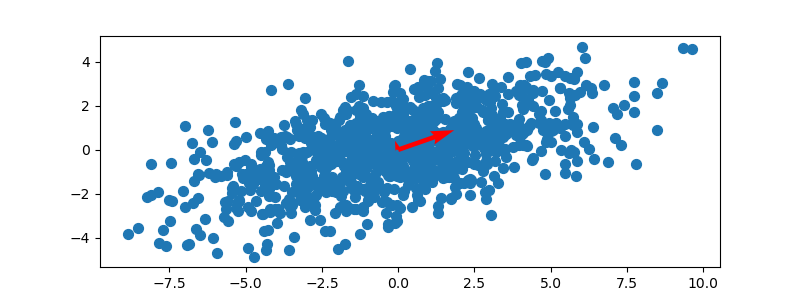

In [98]:
vectors, lambdas = pca(gaussian, 2)
print(vectors)
print(lambdas)

fig, ax = plt.subplots(figsize = (8,3))
plt.scatter(gaussian[:, 0],gaussian[:, 1], s=50, cmap='viridis', zorder = 0)
ax.quiver([0,0], [0,0], [lambdas[0] * vectors[0,0], lambdas[1] * vectors[1,0]], [lambdas[0] * vectors[0,1], lambdas[1] * vectors[1,1]], color = 'red',zorder=1)


In [99]:
## Check that the results of PCA implementation is correct:
from sklearn.decomposition import PCA
pca_py = PCA(2)
pca_py.fit(gaussian)
print(pca_py.components_)
print(pca_py.explained_variance_)

[[ 0.94408509  0.32970189]
 [-0.32970189  0.94408509]]
[11.06312147  1.78361395]


### 3c. Eigenvalues and eigenvectors
A number $\lambda\in \mathbb{F}$ is called an eigenvalue of $T$ if there exists a non-zero vector in the vector space such that $Tv = $ $\lambda v$. And this non-zero vector is an eigenvector corresponding to this $\lambda$.

### 3d. Covariance
(1) Covariance is formally defined as follows:
$$Cov(X,Y)=E((X − E(X))(Y − E(Y))).$$

The covariance between X and Y measures how the values of X and Y change relative to each other. More specifically:

* If $Cov(X,Y) > 0 $, then as one variable increases, the other also increases.

* If $Cov(X,Y) < 0 $, then as one variablle increases, the other decreases.

* If $Cov(X,Y) = 0 $, then as one variable increasing/decreasing, the other is not affected.

* The larger the absolute value of the covariance, the more the change in one vector affects the other.

(2) The covariant matrix is formally defined as follows:
$$ C = \frac{1}{n - 1}X^T X.$$

Covariance matrix estimates the variance in individual random variables and also measures whether variables are correlated. 

(3) If we did not center the data, the first principal component would have calculated a higher variance since it must account for sum-of-squares due to the mean. 

### 3e. Principal components
All the original data vectors can be rewritten as some linear combination of the principal components that we have obtained from the PCA method.

We can think of the principal component matrix as a change of basis. 

PCA finds a basis in a suitable lower dimensional vector space, so that we can write the vectors wrt the new basis. 

## Question 4: PCA on logos data

### 4a. Logos 

<IPython.core.display.Javascript object>


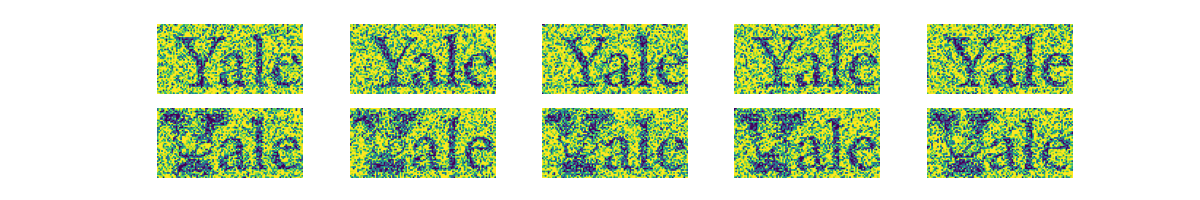

In [100]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = logos[:,:,i].flatten().reshape(48, 100)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')

In [101]:
vectors, lambdas = pca(logos_X, 4)
print('The principal components are:')
print(vectors)
print('The variances are:')
print(lambdas)

## Check that the results of PCA implementation is correct:
from sklearn.decomposition import PCA
pca_py = PCA(4)
pca_py.fit(logos_X)
print('Comparing results from the built-in python PCA package:')
print(pca_py.components_)
print(pca_py.explained_variance_)


The principal components are:
[[-0.0080998  -0.00015195  0.00112716 ... -0.00420733  0.00752419
  -0.00148493]
 [-0.00852093  0.00283516 -0.00019481 ... -0.00257253 -0.00016916
   0.01651369]
 [-0.03398828 -0.02623339 -0.00093492 ...  0.02769374 -0.01182632
   0.01279329]
 [-0.00368619 -0.0145748  -0.00371281 ... -0.0209302  -0.00190254
   0.01224017]]
The variances are:
[98.03875097 54.99611318 51.56296903 50.87353879]
Comparing results from the built-in python PCA package:
[[-0.0080998  -0.00015195  0.00112716 ... -0.00420733  0.00752419
  -0.00148493]
 [-0.00852093  0.00283516 -0.00019481 ... -0.00257253 -0.00016916
   0.01651369]
 [-0.03398828 -0.02623339 -0.00093492 ...  0.02769374 -0.01182632
   0.01279329]
 [ 0.00368619  0.0145748   0.00371281 ...  0.0209302   0.00190254
  -0.01224017]]
[98.03875097 54.99611318 51.56296903 50.87353879]


In [1]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = vectors[i].reshape(48, 100)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')

NameError: name 'plt' is not defined

[98.03875097 54.99611318 51.56296903 50.87353879]


<IPython.core.display.Javascript object>


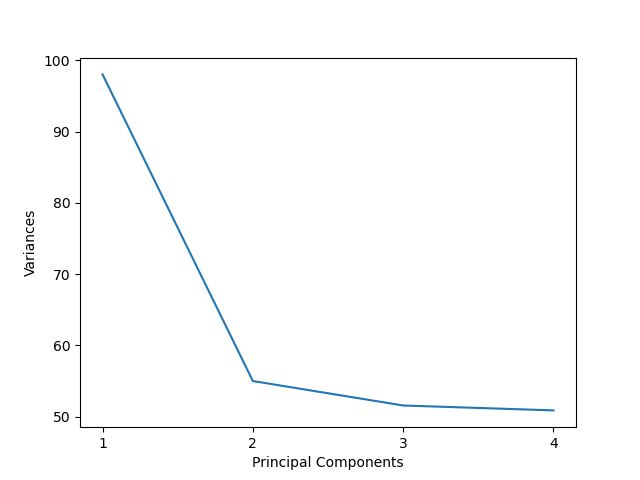

Text(0, 0.5, 'Variances')

In [103]:
%matplotlib notebook

x = [1,2,3,4]
print(lambdas)
plt.plot(x, lambdas)
plt.xticks(np.arange(1, 5, 1))
plt.xlabel('Principal Components')
plt.ylabel('Variances')

The first principal component has the highest variance, carrying the most amount of information about the data. The second principal component has less variance, thus carrying less information, and so on. 

Since the first principal component has significantly larger variance than the rest of the principal components, it is reasonable to keep only the first one in the feature vector. This will give us a reasonably accurate estimation of the original data while reducing the dimension.

This result is expected. In the previous plot of the images, we have observed that only the letter "Y" is different across all the images.

### 4b.

The image of the letter "Y" is the direction of the largest variance and accounts for the most amount of information. This means that the region around letter "Y" is where the most salient difference occur among all the images. Indeed, we see that apart from the letter "Y," all the images are more or less the same for the rest of the letters in the logo. 


### 4c. Projecting onto the first principal component 


In [12]:
logos_X_new = np.array(np.matmul(vectors[0].T, logos_X.T))
print(logos_X_new)
print(logos_X_new.shape)
logos_X_new = logos_X_new.reshape(10,1)
print(logos_X_new.shape)

[-17.06895195 -16.60917463 -17.69981196 -16.76693376 -17.10784296
   1.94909406   0.55157991   1.86932795   2.4794182    1.68652821]
(10,)
(10, 1)


The component matrix gives a new set of basis vectors (i.e. a new coordinate system where each point in the data can be written in terms of the new bases), sorted based on their corresponding variance from largest to smallest.  Given our needs and contraints, we can then choose just the first few principal components to reduce the dimension while retaining most of the information about the original data. (discarding some component will mean loss of data but the correpsonding variance is small enough to be negligible)

### 4d. Run kmeans on the new data

<IPython.core.display.Javascript object>


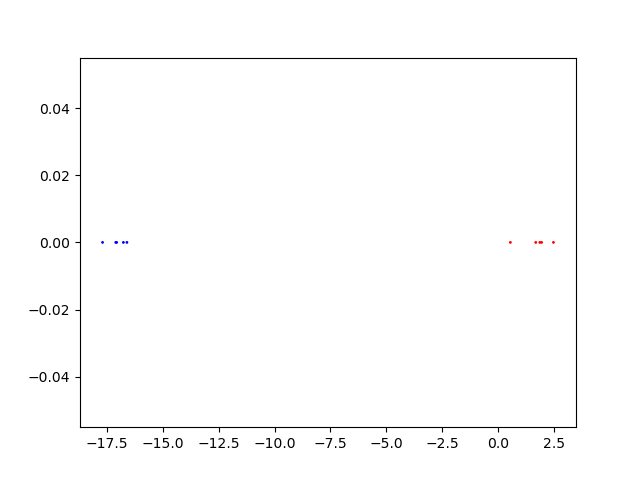

In [14]:
%matplotlib notebook

clusters_new, centroids_new = kmeans(logos_X_new, 2)

plt.scatter(logos_X_new[:, 0], np.zeros((10,1)) , c = clusters_new, s=1, cmap='bwr')

The result is expected. From the images below, we can see that the data are divided into two groups: the logos with bulldog mascot on the letter "Y" and those without. 

<IPython.core.display.Javascript object>


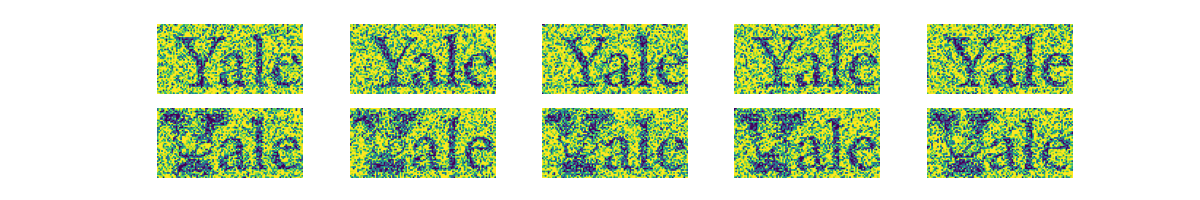

In [15]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = logos[:,:,i].flatten().reshape(48, 100)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')

In [16]:
print(clusters_new)
print(centroids_new)

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[[-17.05054305]
 [  1.70718967]]


[[0.77915206 0.76360984 0.84842992 ... 0.77327346 0.73600757 0.88421533]]
[[0.63326771 0.76473733 0.87632933 ... 0.70614341 0.88824149 0.83497391]]


<IPython.core.display.Javascript object>


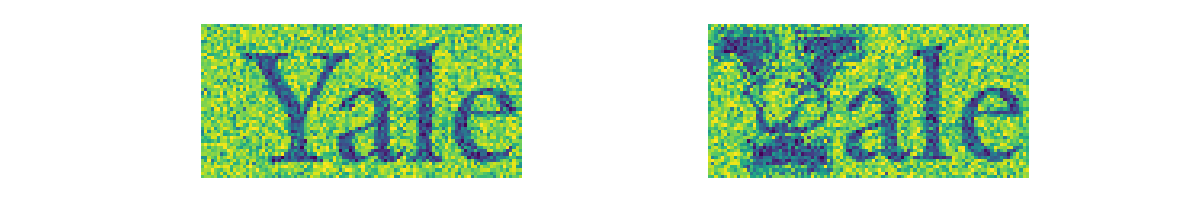

In [17]:
centroid = np.zeros((2,1,4800))
n1 = 0

for i in range(10):
    if(clusters_new[i] == 0):
        centroid[0] = centroid[0] + logos_X[i]
        n1 += 1
    else:
        centroid[1] = centroid[1] + logos_X[i]
centroid[0] = centroid[0] / n1
centroid[1] = centroid[1] / (10 - n1)

print(centroid[0])
print(centroid[1])
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = centroid[i].reshape(48, 100)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')

In [19]:
for i in range(500):
    clusters_new, centroids_new = kmeans(logos_X_new, 2)

In [21]:
print(clusters_new)
print(centroids_new)

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
[[  1.70718967]
 [-17.05054305]]


[[0.63326771 0.76473733 0.87632933 ... 0.70614341 0.88824149 0.83497391]]
[[0.77915206 0.76360984 0.84842992 ... 0.77327346 0.73600757 0.88421533]]


<IPython.core.display.Javascript object>


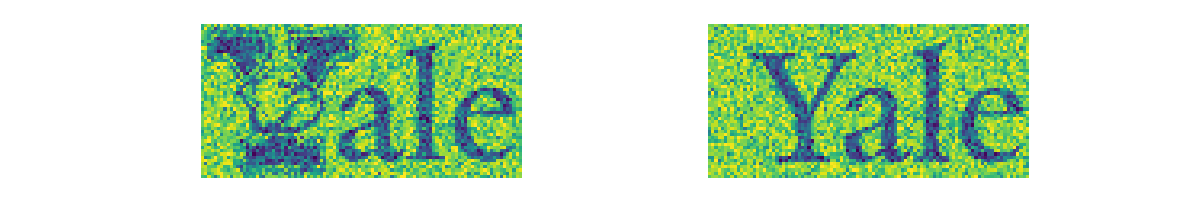

In [20]:
centroid = np.zeros((2,1,4800))
n1 = 0

for i in range(10):
    if(clusters_new[i] == 0):
        centroid[0] = centroid[0] + logos_X[i]
        n1 += 1
    else:
        centroid[1] = centroid[1] + logos_X[i]
centroid[0] = centroid[0] / n1
centroid[1] = centroid[1] / (10 - n1)

print(centroid[0])
print(centroid[1])
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = centroid[i].reshape(48, 100)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')

### comments on the results:

Running kmeans on the reduced data gives us the correct clustering result:
* the clustering assignment is [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.], which aligns with our observation. 
* the centroids are the logo with the bulldog mascot on the letter "Y" for Cluster 1 and the logo without the bulldog on the letter "Y" for Cluster 2. 

### 4e. Compare with part 2:

Previously, without using PCA, the kmeans algorithm did not succeed in discovering the correct centroid images and the clustering assignment.

This confirms that the kmeans algorithm performs better after PCA is applied.

In the experiment using kmeans without PCA, we use all 10 data vectors (the 10 images). With PCA, we first represent the 10 data vectors as linear combinations of the first principal component (which contains most of the ). Thus, instead of using all the data in kmeans clustering, we are using the projection of the original data onto the first principal component. Reducing the number of vectors involved then greatly reduces the error while calculating the Euclidean distance. As a result, the kmeans clustering algorithm performs better after using PCA.

## Question 5: PCA on faces data

In [1]:
import numpy as np
from scipy.io import loadmat, savemat 

face = np.double(loadmat('faces.mat')['Data'])

## need to do this to normalize!!
## first normalization
maxface = np.max(face,axis=1,keepdims=1)    
face_norm1 = face/maxface # devide each img (i.e., each row) by its maximum pixel value
savemat('faces_norm1.mat', {'Data':face_norm1})

## try second normalization
norm_face = np.linalg.norm(face,axis=1,keepdims=1)    
face_norm2 = face/norm_face
savemat('faces_norm2.mat', {'Data':face_norm2})

In [22]:
from scipy.io import loadmat
faces = loadmat('faces.mat')['Data']
n, p = faces.shape

## convert to double and normalize
for i in range(n):
    for j in range(len(faces[i])):
        faces[i,j] = float(faces[i,j])
    ind = np.argmax(faces[i], axis = 0)
    faces[i,ind] = 1
faces

array([[182, 183, 182, ...,   8,   5,   5],
       [ 76,  87,  81, ..., 228, 211, 168],
       [177, 176, 174, ...,   1,   1,   1],
       ...,
       [ 56,  57,  55, ...,  70,  71,  72],
       [ 54,  26,  16, ..., 191, 146,  48],
       [ 70,  67,  62, ...,  50,  39,  42]])

<IPython.core.display.Javascript object>


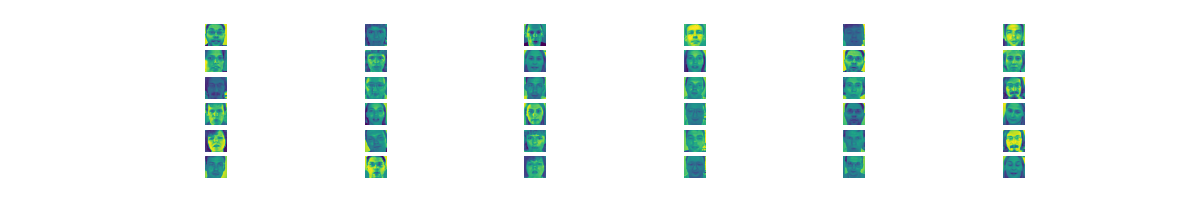

In [34]:
some_faces = faces[0:36,:]
fig, axs = plt.subplots(nrows = 6, ncols = 6, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = some_faces[i].T.reshape(96,96)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')

In [24]:
faces_vectors, faces_lambdas = pca(faces, 9)
print(faces_vectors)
print(faces_lambdas)

[[ 0.00516266  0.00571262  0.00616873 ...  0.00565412  0.00527226
   0.0052666 ]
 [-0.00831677 -0.01140889 -0.01073589 ... -0.02556277 -0.02559957
  -0.02535712]
 [-0.01530003 -0.01395995 -0.01466192 ...  0.00941637  0.00919655
   0.00931409]
 ...
 [ 0.01917584  0.03226543  0.03109256 ... -0.00118981  0.00073198
   0.00263177]
 [-0.02451695 -0.02451274 -0.02696378 ... -0.02392749 -0.02512164
  -0.02515153]
 [ 0.01219074  0.01046591  0.01063925 ... -0.00508186 -0.0067239
  -0.00672238]]
[8730303.50610032 4067383.8337494  2622454.64875423 1411397.08353211
 1041704.25800328  810663.43520235  562477.72637894  445320.37410387
  401699.10187489]


In [200]:
## Check the result against the built-in python package:

pca_py = PCA(9)
pca_py.fit(faces)
print(pca_py.components_)
print(pca_py.explained_variance_)

[[-0.00516266 -0.00571262 -0.00616873 ... -0.00565412 -0.00527226
  -0.0052666 ]
 [ 0.00831677  0.01140889  0.01073589 ...  0.02556277  0.02559957
   0.02535712]
 [ 0.01530003  0.01395995  0.01466192 ... -0.00941637 -0.00919655
  -0.00931409]
 ...
 [ 0.01917597  0.03226484  0.03109193 ... -0.00119145  0.00073018
   0.00263002]
 [ 0.02451565  0.0245188   0.02697    ...  0.02393988  0.02513515
   0.02516487]
 [ 0.01219184  0.01047783  0.01065163 ... -0.00507985 -0.00672156
  -0.00672033]]
[8730303.50610032 4067383.83374939 2622454.64875422 1411397.0835321
 1041704.25800323  810663.43519817  562477.72497153  445320.30776697
  401699.05373759]


<IPython.core.display.Javascript object>


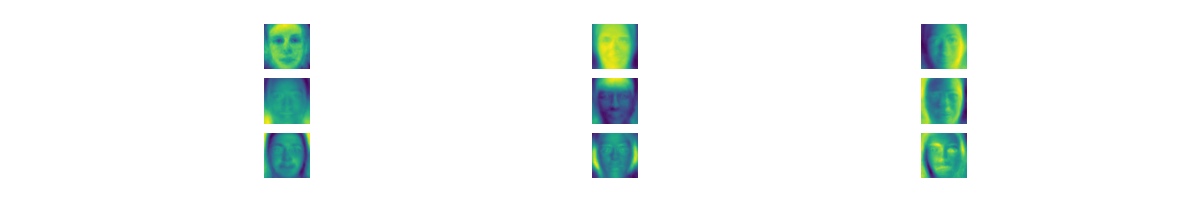

In [28]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = faces_vectors[i].reshape(96,96)
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')

<IPython.core.display.Javascript object>


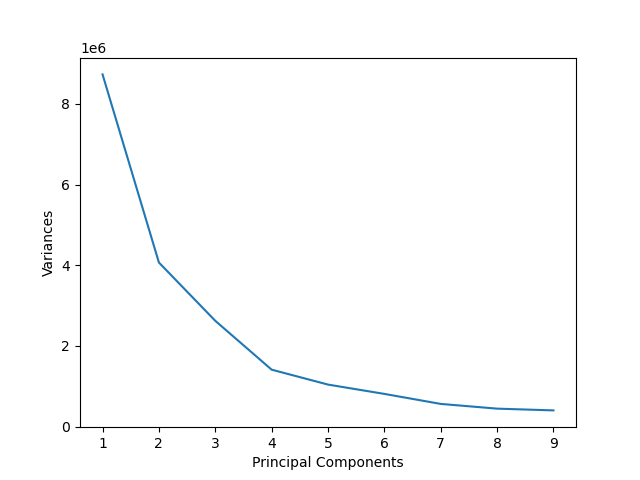

Text(0, 0.5, 'Variances')

In [105]:
%matplotlib notebook

x = [1,2,3,4,5,6,7,8,9]
plt.plot(x, faces_lambdas)
plt.xticks(np.arange(1, 10, 1))
plt.xlabel('Principal Components')
plt.ylabel('Variances')

### 5b. Compare with SVD

In [37]:
faces = faces - faces.mean(axis=0)
[U,s,Vt] = np.linalg.svd(faces)

In [38]:
print(s)

[9.33893634e+04 6.37441484e+04 5.11842964e+04 3.75497761e+04
 3.22593018e+04 2.84579123e+04 2.37047516e+04 2.10920614e+04
 2.00324088e+04 1.93445543e+04 1.84845360e+04 1.71964281e+04
 1.62306315e+04 1.54632231e+04 1.42976840e+04 1.36969684e+04
 1.30849844e+04 1.28135025e+04 1.25028521e+04 1.19900609e+04
 1.15261581e+04 1.13310091e+04 1.11954952e+04 1.07117927e+04
 1.01761358e+04 9.90547852e+03 9.77962954e+03 9.62254423e+03
 9.50721010e+03 9.35642730e+03 9.29678811e+03 9.01254148e+03
 8.68870107e+03 8.63384744e+03 8.41699460e+03 8.30445614e+03
 8.10151577e+03 8.03556658e+03 7.96416584e+03 7.67802729e+03
 7.62037303e+03 7.46938423e+03 7.42810992e+03 7.26506850e+03
 7.14791108e+03 7.05546511e+03 7.00341824e+03 6.86371795e+03
 6.84172064e+03 6.81010550e+03 6.78087338e+03 6.58849955e+03
 6.50133758e+03 6.49498424e+03 6.37879388e+03 6.31562788e+03
 6.21399369e+03 6.17889533e+03 6.10932490e+03 6.01428421e+03
 5.96273788e+03 5.88686251e+03 5.83959599e+03 5.80791498e+03
 5.77160724e+03 5.638695

In [40]:
v = s ** 2 / (n - 1)
print(v)

[8.73030351e+06 4.06738383e+06 2.62245465e+06 1.41139708e+06
 1.04170426e+06 8.10663435e+05 5.62477726e+05 4.45320374e+05
 4.01699102e+05 3.74586369e+05 3.42020091e+05 2.96013154e+05
 2.63697096e+05 2.39350620e+05 2.04628395e+05 1.87794739e+05
 1.71388205e+05 1.64350195e+05 1.56477789e+05 1.43905466e+05
 1.32985305e+05 1.28520288e+05 1.25464577e+05 1.14857361e+05
 1.03657398e+05 9.82167214e+04 9.57368909e+04 9.26860436e+04
 9.04775214e+04 8.76303622e+04 8.65167859e+04 8.13072112e+04
 7.55690954e+04 7.46179395e+04 7.09167148e+04 6.90330248e+04
 6.57002581e+04 6.46349652e+04 6.34914290e+04 5.90111142e+04
 5.81282134e+04 5.58475482e+04 5.52320490e+04 5.28340544e+04
 5.11437766e+04 4.98294173e+04 4.90969640e+04 4.71577818e+04
 4.68559973e+04 4.64239609e+04 4.60262701e+04 4.34517781e+04
 4.23097001e+04 4.22270473e+04 4.07297411e+04 3.99270826e+04
 3.86523699e+04 3.82169644e+04 3.73612119e+04 3.62078224e+04
 3.55898328e+04 3.46898400e+04 3.41350163e+04 3.37656420e+04
 3.33447950e+04 3.182671

In [42]:
Vt.shape

(9216, 9216)

In [43]:
V = Vt.T

In [46]:
V[:,0:9]

array([[ 0.00516266, -0.00831677,  0.01530003, ...,  0.01917584,
        -0.02451695,  0.01219074],
       [ 0.00571262, -0.01140889,  0.01395995, ...,  0.03226543,
        -0.02451274,  0.01046591],
       [ 0.00616873, -0.01073589,  0.01466192, ...,  0.03109256,
        -0.02696378,  0.01063925],
       ...,
       [ 0.00565412, -0.02556277, -0.00941637, ..., -0.00118981,
        -0.02392749, -0.00508186],
       [ 0.00527226, -0.02559957, -0.00919655, ...,  0.00073198,
        -0.02512164, -0.0067239 ],
       [ 0.0052666 , -0.02535712, -0.00931409, ...,  0.00263177,
        -0.02515153, -0.00672238]])

In [48]:
v[0:9]

array([8730303.50610031, 4067383.83374939, 2622454.64875423,
       1411397.0835321 , 1041704.25800328,  810663.43520235,
        562477.72637893,  445320.37410387,  401699.10187489])

In [ ]:
'''
Results from part 5a: 

[[ 0.00516266  0.00571262  0.00616873 ...  0.00565412  0.00527226
   0.0052666 ]
 [-0.00831677 -0.01140889 -0.01073589 ... -0.02556277 -0.02559957
  -0.02535712]
 [-0.01530003 -0.01395995 -0.01466192 ...  0.00941637  0.00919655
   0.00931409]
 ...
 [ 0.01917584  0.03226543  0.03109256 ... -0.00118981  0.00073198
   0.00263177]
 [-0.02451695 -0.02451274 -0.02696378 ... -0.02392749 -0.02512164
  -0.02515153]
 [ 0.01219074  0.01046591  0.01063925 ... -0.00508186 -0.0067239
  -0.00672238]]
[8730303.50610032 4067383.8337494  2622454.64875423 1411397.08353211
 1041704.25800328  810663.43520235  562477.72637894  445320.37410387
  401699.10187489]
'''

Observe that V is the same as the principal components from PCA, and v is the same as the variances from PCA.

Proof: 
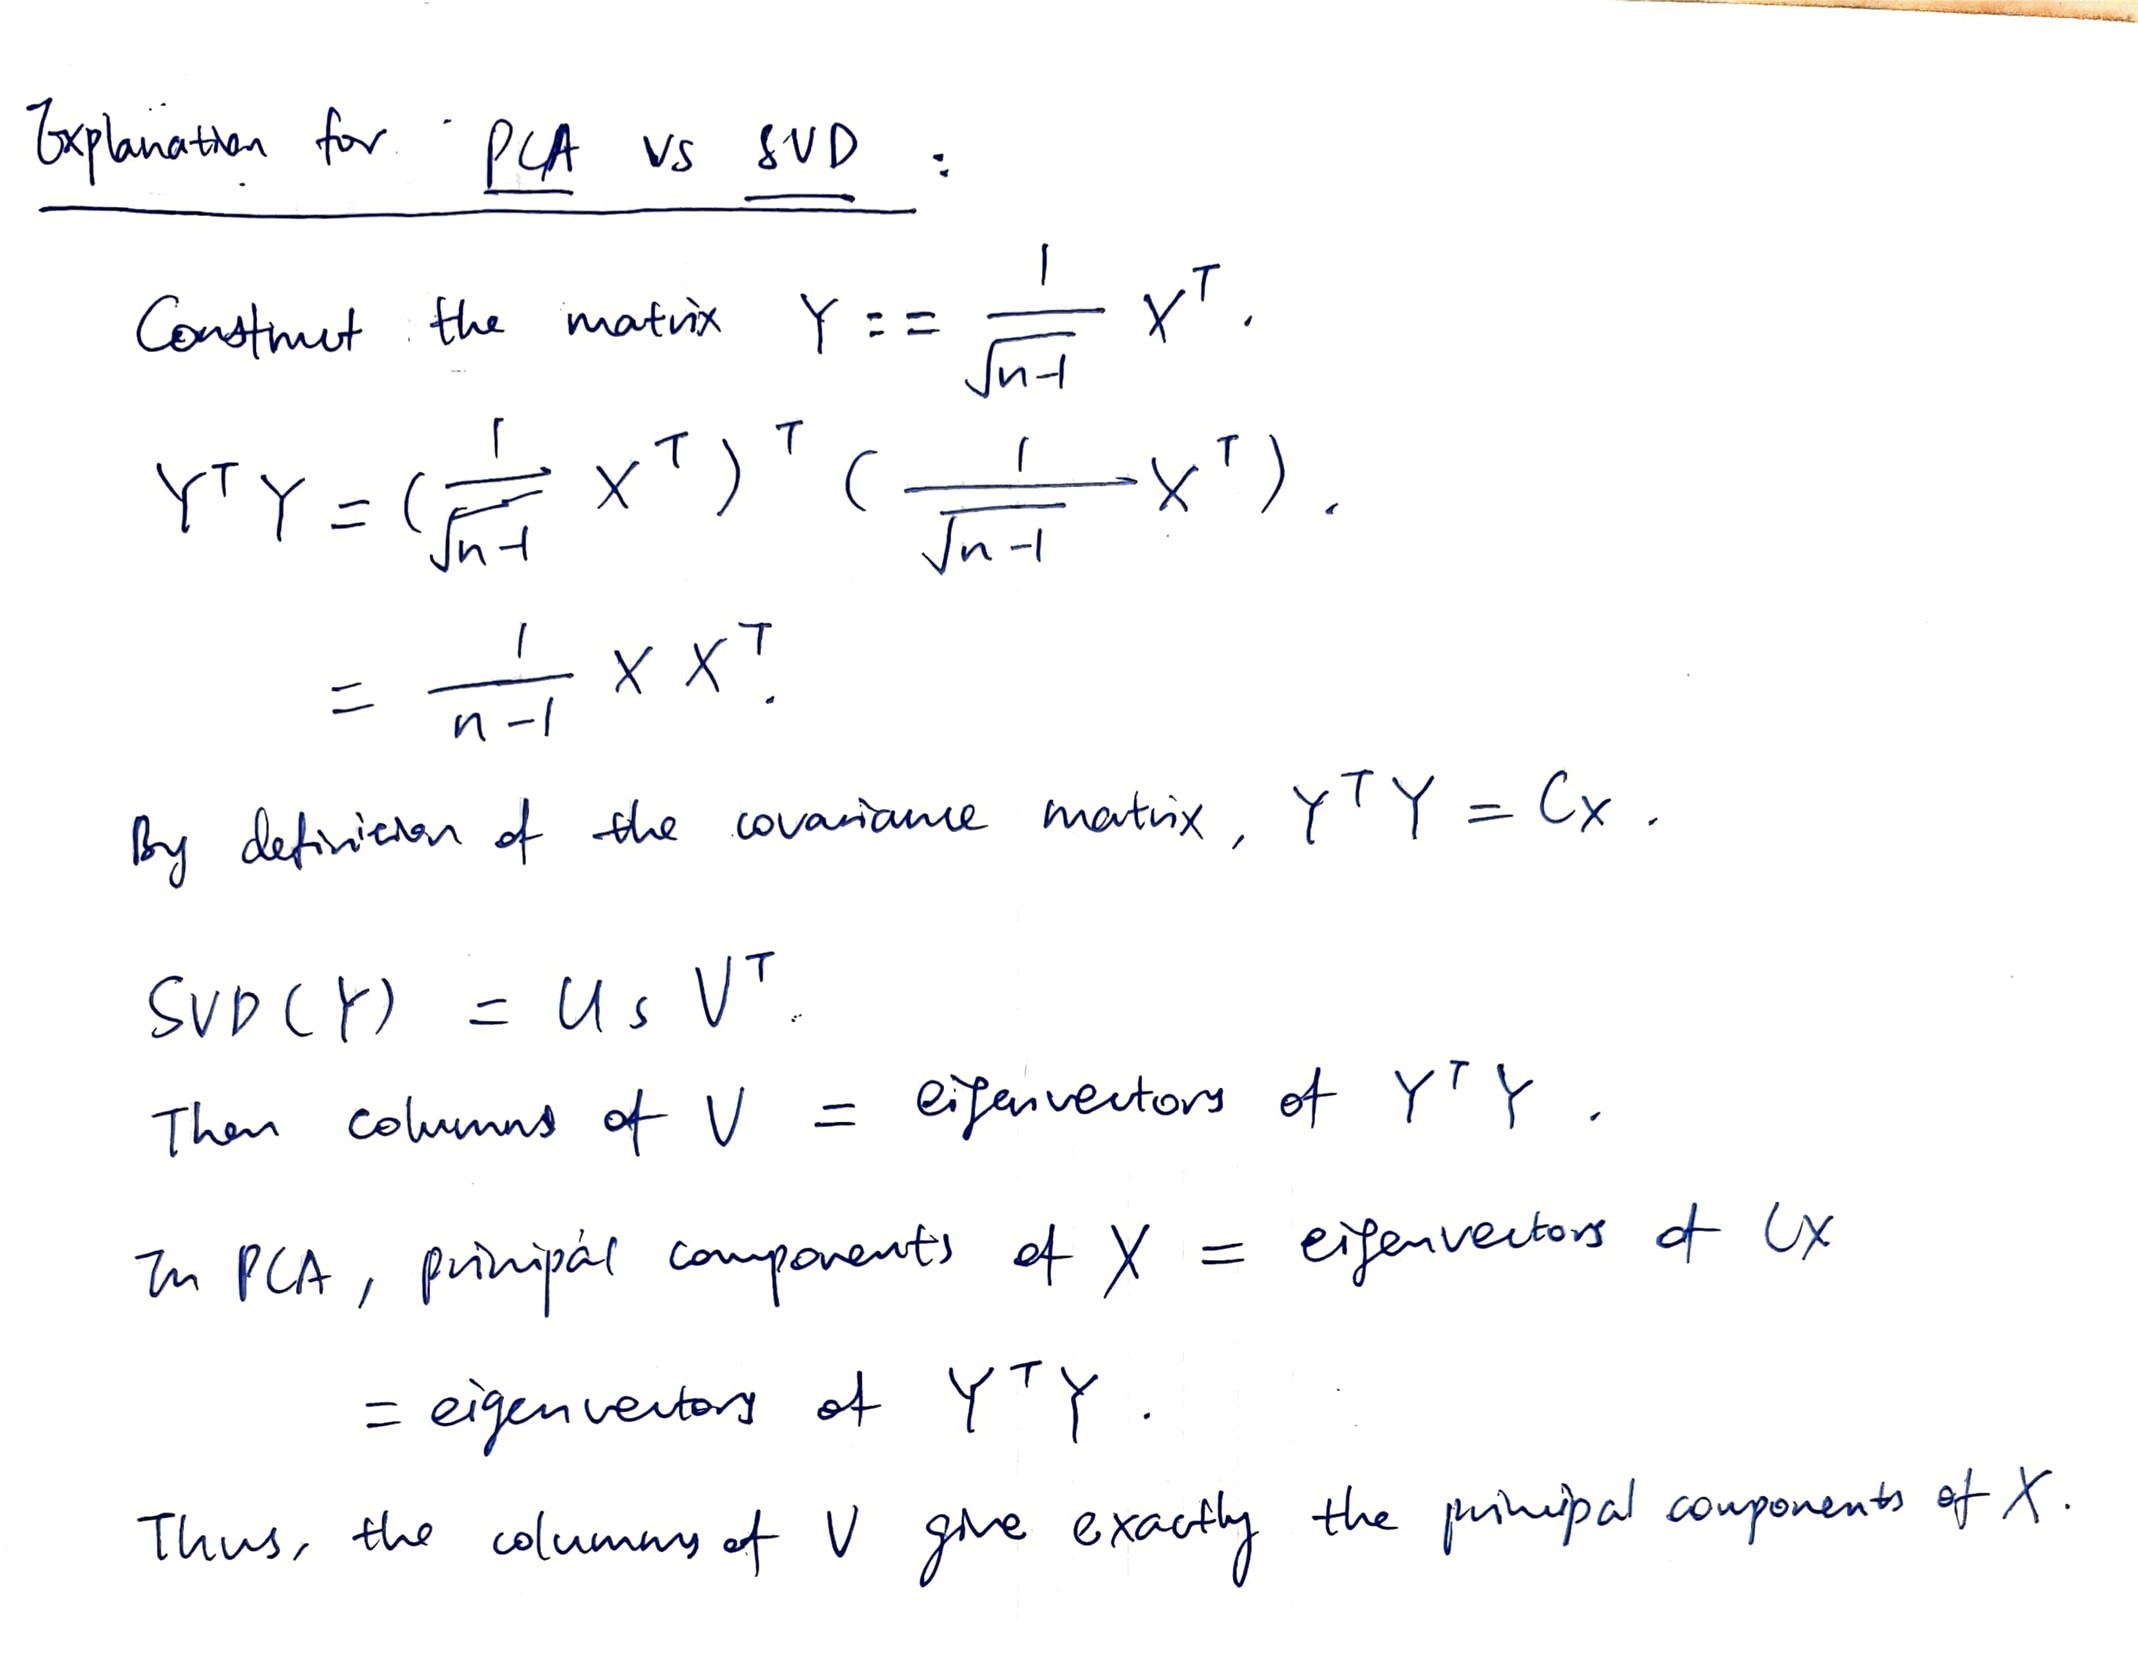

### 5c. Re-implement PCA using SVD:

In [60]:
def pca_alt(X, m):
    X = X - X.mean(axis=0)
    [U,s,Vt] = np.linalg.svd(X, full_matrices = False)
    v = s ** 2 / (n - 1)
    V = Vt.T
    return V[:,0:m], v[0:m]

In [62]:
import time 
start = time.time()
for i in range(10):
    pca_alt(faces, 9)
end = time.time()
average_svd = (end - start)/10
print(average_svd)

3.6454333305358886


In [54]:
import time 
start = time.time()
for i in range(10):
    pca(faces, 9)
end = time.time()
start - end

-1908.7380743026733

In [56]:
average_pca = (end - start)/10
print(average_pca)

190.87380743026733


If full_matrices = False, the shape of U is (M,K) and the shape of Vt is (K,N), where K = min(M,N). This is sufficient for our purpose since the smaller dimension will be the number of columns we eventually need for the number of principal components. Take the faces data as an example, we only need to obtain a matrix of shape (1000,9216) (i.e. 1000 image vectors) and not (9216,9216).